In [8]:
import optforge as of
from opytimizer import Opytimizer
from opytimizer.core import Function
from opytimizer.optimizers.swarm import PSO
from opytimizer.spaces import SearchSpace
from optforge.benchmark.vobench_benchmarks import VOBenchmark
import vobench as vb
import numpy as np

inputs = vb.imread(r"F:\Stuff\Programming\AI\VOBench\notebooks\affine\A2.jpeg")[:,:,0]
targets = vb.imread(r"F:\Stuff\Programming\AI\VOBench\notebooks\affine\A.jpeg")[:,:,0]

2024-09-11 18:30:28,610 - opytimizer.core.space — DEBUG — Agents: 20 | Size: (2, 1) | Lower Bound: [-1. -1.] | Upper Bound: [1. 1.] | Mapping: ['x0', 'x1'] | Built: True.
2024-09-11 18:30:28,612 - opytimizer.optimizers.swarm.pso — INFO — Overriding class: Optimizer -> PSO.
2024-09-11 18:30:28,615 - opytimizer.core.optimizer — DEBUG — Algorithm: PSO | Custom Parameters: None | Built: True.
2024-09-11 18:30:28,616 - opytimizer.optimizers.swarm.pso — INFO — Class overrided.
2024-09-11 18:30:28,616 - opytimizer.core.function — INFO — Creating class: Function.
2024-09-11 18:30:28,616 - opytimizer.core.function — DEBUG — Function: <lambda> | Built: True.
2024-09-11 18:30:28,621 - opytimizer.core.function — INFO — Class created.


C:\Users\nkshv\AppData\Local\Temp\ipykernel_30996\3200439033.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  function = Function(lambda x: float(vob.step_noline(x))) # lambda otherwise it errors due to additional args
100%|##########| 1000/1000 [00:10<00:00, 97.81it/s, fitness=0.0196]


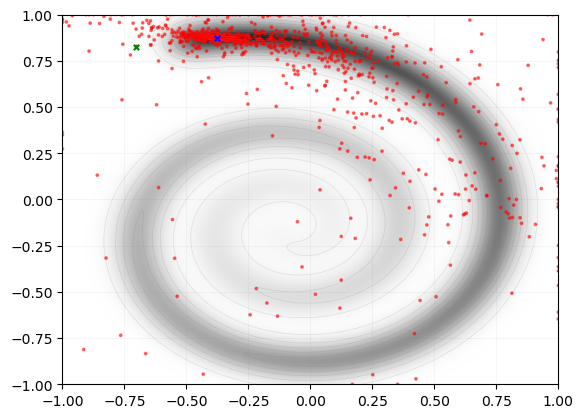

In [9]:
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

space = SearchSpace(20, 2, (-1., -1.), (1., 1.))
optimizer = PSO()
function = Function(lambda x: float(vob.step_noline(x))) # lambda otherwise it errors due to additional args

opt = Opytimizer(space, optimizer, function)
opt.start(n_iterations=1000)

vob.plot()

2024-09-11 18:31:05,490 - opytimizer.optimizers.swarm.pso — INFO — Overriding class: Optimizer -> PSO.
2024-09-11 18:31:05,492 - opytimizer.core.optimizer — DEBUG — Algorithm: PSO | Custom Parameters: None | Built: True.
2024-09-11 18:31:05,493 - opytimizer.optimizers.swarm.pso — INFO — Class overrided.
evals: 1000/1000 | best value: 0.0357                            
Job finished in 0.3s., did 1000 evaluations.


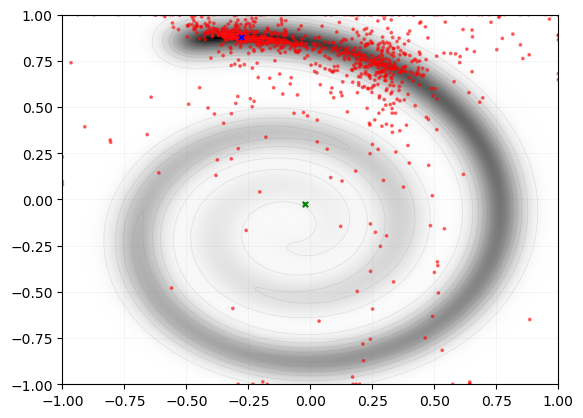

In [10]:
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)
optimizer = of.integrations.OpytimizerWrapper(PSO(), 20)

study = of.minimize(
    vob.step_noline,
    vob.params,
    optimizer,
    max_evals = 1000,
    bounds = (-1, 1)
)

vob.plot()